In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
def calculate_ss(m, o, e):
    m_minus_o = np.subtract(float(m), o)
    m_minus_o_squared = np.power(m_minus_o, 2)
    e_squared = np.power(e, 2)
    o_squared = np.power(o, 2)
    
    sum_m_minus_o_squared = np.sum(m_minus_o_squared)
    sum_e_squared = np.sum(e_squared)
    sum_o_squared = np.sum(o_squared)
    
    numerator = (sum_m_minus_o_squared - sum_e_squared)
    print(numerator)
    denominator = (sum_o_squared - sum_e_squared)
    print(denominator)
    
    print(np.sqrt(numerator/denominator))
    return 1 - np.sqrt(numerator/denominator)

In [3]:
def calculate_rmse(m, o):
    m_minus_o = np.subtract(float(m), o)
    print(m_minus_o)
    m_minus_o_squared = np.power(m_minus_o, 2)
    print(m_minus_o_squared)
    sum_m_minus_o_squared = np.sum(m_minus_o_squared)
    print(sum_m_minus_o_squared)
    n = len(o)
    return np.sqrt(sum_m_minus_o_squared/n)


In [4]:
# kunlun

o_e_data=pd.read_csv('kunlun_pass_o_e.csv')
m_data = pd.read_csv('/Users/alexaterrazas/Desktop/PlioMIP2/tas/kunlun_pass_m.csv')


# Assuming m_data is your DataFrame
# Separate the row with 'PlioMIP2 Ensemble'
pliomip2_row = m_data[m_data['model'] == 'PlioMIP2 Ensemble']

# Drop the 'PlioMIP2 Ensemble' row from the original DataFrame
m_data_without_pliomip2 = m_data[m_data['model'] != 'PlioMIP2 Ensemble']

# Append the 'PlioMIP2 Ensemble' row to the end
m_data = m_data_without_pliomip2.append(pliomip2_row, ignore_index=True)

# Display the reordered DataFrame
m_data


/var/folders/_1/xcmb4cbj6dd5wy_54lgm1nw40000gn/T/ipykernel_3899/2376588918.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m_data = m_data_without_pliomip2.append(pliomip2_row, ignore_index=True)


,Unnamed: 0,model,m
0,0,CESM2,3.505981
1,1,EC-Earth3-LR,6.393372
2,2,GISS-E2-1-G,1.879913
3,4,HadGEM3-GC31-LL,5.451202
4,5,IPSL-CM6A-LR,5.136871
5,6,NorESM1-F,2.013184
6,3,PlioMIP2 Ensemble,4.063421


In [5]:
m_data


,Unnamed: 0,model,m
0,0,CESM2,3.505981
1,1,EC-Earth3-LR,6.393372
2,2,GISS-E2-1-G,1.879913
3,4,HadGEM3-GC31-LL,5.451202
4,5,IPSL-CM6A-LR,5.136871
5,6,NorESM1-F,2.013184
6,3,PlioMIP2 Ensemble,4.063421


In [6]:

o_e_data[['TF4_MAAT_anom', 'TF4_MAAT_error']]
o_e_data

,Unnamed: 0,Sample Number,Age (Ma),Replicates for clumped isotope analysis,Δ47,1 s.e.,"Surface lake summer temperature (SLST) (°C) (Bernasconi et al., 2018)",1 s.e..1,Latitude,HS_MAAT_error,...,TF3_MAAT_error,TF2_MAAT_error,TF1_MAAT_error,TF4_MAAT,TF3_MAAT,TF2_MAAT,TF1_MAAT,HS_MAAT,TF4_MAAT_anom,HS_MAAT_anom
0,30,16KL180,3.096151,7,0.699333,0.017525,17.506965,4.738917,35.65,7.207096,...,6.012265,6.888928,6.888928,-0.577043,7.350040,3.825237,4.018025,5.239565,5.922957,11.739565
1,31,16KL178,3.120000,4,0.697667,0.008667,17.787062,2.373279,35.65,5.925990,...,4.395731,5.534659,5.534659,-0.401776,7.592592,4.182876,4.376942,5.598616,6.098224,12.098616
2,32,16KL176,3.136741,6,0.738000,0.009074,7.320977,3.883151,35.65,6.675609,...,5.363661,6.330787,6.330787,-7.409191,-1.630519,-8.839505,-9.034300,-8.404020,-0.909191,-1.904020
3,33,16KL169,3.207773,8,0.711667,0.016180,14.157215,4.284321,35.65,6.916669,...,5.660866,6.584482,6.584482,-2.725385,4.431055,-0.412952,-0.274345,0.878702,3.774615,7.378702
4,34,16KL167,3.228068,6,0.730667,0.009207,9.142749,2.324893,35.65,5.906778,...,4.369797,5.514084,5.514084,-6.121734,-0.001483,-6.623167,-6.699881,-5.880047,0.378266,0.619953


In [7]:
2.1159317323287277

2.1159317323287277

In [8]:
np.sqrt(np.sum(np.power(o_e_data['TF4_MAAT_error'],2))/len(o_e_data['TF4_MAAT_error']))/np.sqrt(len(o_e_data['TF4_MAAT_error']))

2.1159317323287277

In [9]:
def skill_of_model(model):
    skill_TF4 = calculate_ss(
        m_data[m_data['model']==model]['m'], 
        o_e_data['TF4_MAAT_anom'],
        o_e_data['TF4_MAAT_error']

    )
    skill_HS = calculate_ss(
        m_data[m_data['model']==model]['m'], 
        o_e_data['HS_MAAT_anom'],
        o_e_data['HS_MAAT_error']
    )
    return skill_TF4, skill_HS

In [10]:
for model in m_data['model']:
    print(skill_of_model(model))

-70.01916921180032
-24.441995324151122
1.6925447046967783
-20.133174344876267
128.29509612719414
nan
(-0.6925447046967783, nan)
-15.253969055384289
-24.441995324151122
0.789992743664956
-50.072142325349745
128.29509612719414
nan
(0.21000725633504402, nan)
-64.16489061723533
-24.441995324151122
1.620243921336426
33.42326450967022
128.29509612719414
0.5104102705382884
(-0.6202439213364259, 0.48958972946171164)
-42.28775159672179
-24.441995324151122
1.3153428518983123
-49.46655032496838
128.29509612719414
nan
(-0.31534285189831235, nan)
-49.332108012439086
-24.441995324151122
1.4206807913410746
-47.289724549784125
128.29509612719414
nan
(-0.4206807913410746, nan)
-65.63942690208133
-24.441995324151122
1.6387551213928533
28.039126027963306
128.29509612719414
0.4674952559415368
(-0.6387551213928533, 0.5325047440584632)
-65.94023475982783
-24.441995324151122
1.6425058164113373
-32.40722035792294
128.29509612719414
nan
(-0.6425058164113373, nan)


/var/folders/_1/xcmb4cbj6dd5wy_54lgm1nw40000gn/T/ipykernel_3899/1700076709.py:16: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(numerator/denominator))
/var/folders/_1/xcmb4cbj6dd5wy_54lgm1nw40000gn/T/ipykernel_3899/1700076709.py:17: RuntimeWarning: invalid value encountered in sqrt
  return 1 - np.sqrt(numerator/denominator)


In [32]:
# Initialize lists to store model names and skill scores
model_names = []
skill_scores_TF4 = []
skill_scores_HS = []

# Loop over the models and store the results in lists
for model in m_data['model']:
    skill_TF4, skill_HS = skill_of_model(model)
    model_names.append(model)
    skill_scores_TF4.append(skill_TF4)
    skill_scores_HS.append(skill_HS)

# Create a DataFrame using the collected data
results_df = pd.DataFrame({
    'Model': model_names,
    'Skill_TF4': skill_scores_TF4,
    'Skill_HS': skill_scores_HS
})

results_df.to_csv('kunlun_ss_df.csv') 

-70.01916921180032
-24.441995324151122
1.6925447046967783
-20.133174344876267
128.29509612719414
nan
-15.253969055384289
-24.441995324151122
0.789992743664956
-50.072142325349745
128.29509612719414
nan
-64.16489061723533
-24.441995324151122
1.620243921336426
33.42326450967022
128.29509612719414
0.5104102705382884
-42.28775159672179
-24.441995324151122
1.3153428518983123
-49.46655032496838
128.29509612719414
nan
-49.332108012439086
-24.441995324151122
1.4206807913410746
-47.289724549784125
128.29509612719414
nan
-65.63942690208133
-24.441995324151122
1.6387551213928533
28.039126027963306
128.29509612719414
0.4674952559415368
-65.94023475982783
-24.441995324151122
1.6425058164113373
-32.40722035792294
128.29509612719414
nan


/var/folders/_1/xcmb4cbj6dd5wy_54lgm1nw40000gn/T/ipykernel_3899/1700076709.py:16: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(numerator/denominator))
/var/folders/_1/xcmb4cbj6dd5wy_54lgm1nw40000gn/T/ipykernel_3899/1700076709.py:17: RuntimeWarning: invalid value encountered in sqrt
  return 1 - np.sqrt(numerator/denominator)


In [12]:
np.sqrt(np.sum(np.power(o_e_data['TF4_MAAT_error'],2))/5)/np.sqrt(5)

2.1159317323287277

In [13]:
m_data

,Unnamed: 0,model,m
0,0,CESM2,3.505981
1,1,EC-Earth3-LR,6.393372
2,2,GISS-E2-1-G,1.879913
3,4,HadGEM3-GC31-LL,5.451202
4,5,IPSL-CM6A-LR,5.136871
5,6,NorESM1-F,2.013184
6,3,PlioMIP2 Ensemble,4.063421


-70.01916921180032
-24.441995324151122
1.6925447046967783
-20.133174344876267
128.29509612719414
nan
-15.253969055384289
-24.441995324151122
0.789992743664956
-50.072142325349745
128.29509612719414
nan
-64.16489061723533
-24.441995324151122
1.620243921336426
33.42326450967022
128.29509612719414
0.5104102705382884
-42.28775159672179
-24.441995324151122
1.3153428518983123
-49.46655032496838
128.29509612719414
nan
-49.332108012439086
-24.441995324151122
1.4206807913410746
-47.289724549784125
128.29509612719414
nan
-65.63942690208133
-24.441995324151122
1.6387551213928533
28.039126027963306
128.29509612719414
0.4674952559415368
-65.94023475982783
-24.441995324151122
1.6425058164113373
-32.40722035792294
128.29509612719414
nan


/var/folders/_1/xcmb4cbj6dd5wy_54lgm1nw40000gn/T/ipykernel_3899/1700076709.py:16: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(numerator/denominator))
/var/folders/_1/xcmb4cbj6dd5wy_54lgm1nw40000gn/T/ipykernel_3899/1700076709.py:17: RuntimeWarning: invalid value encountered in sqrt
  return 1 - np.sqrt(numerator/denominator)


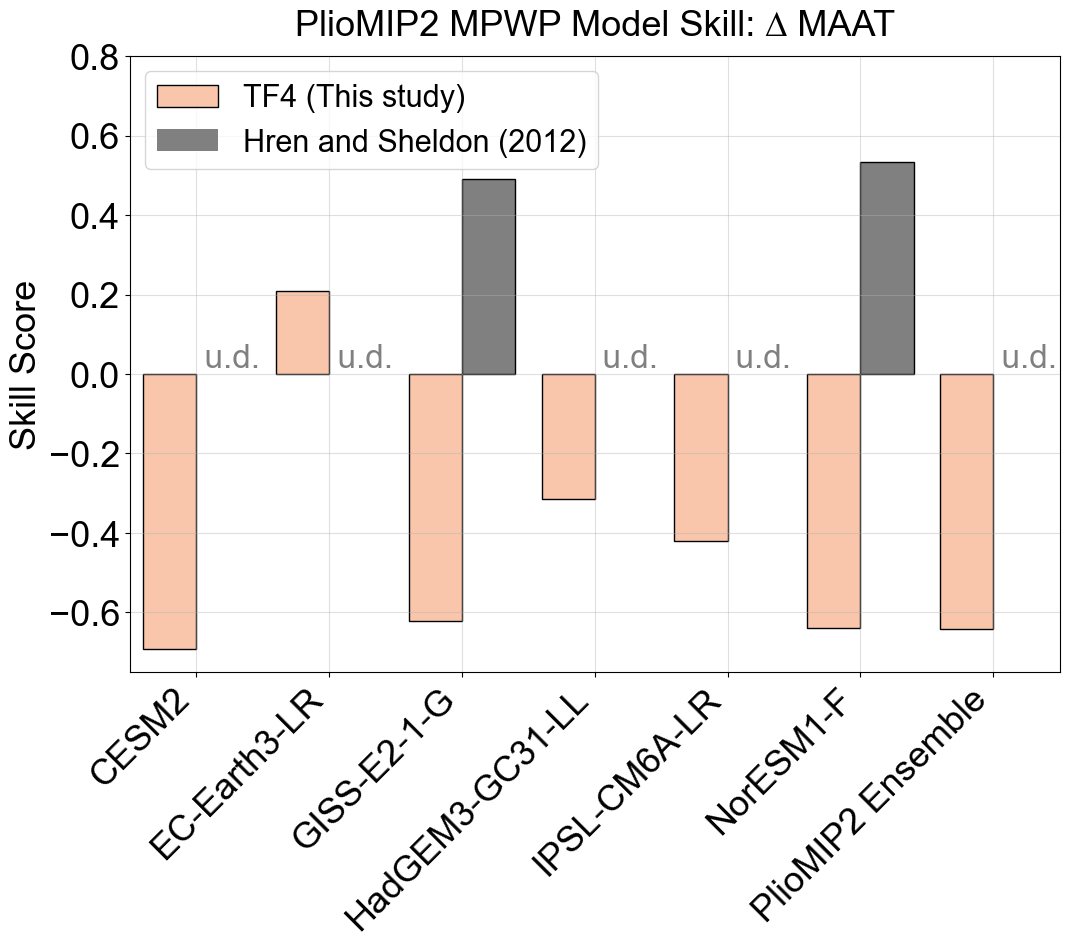

In [31]:
# Collect skill scores for each model
models = m_data['model']
skill_scores_TF4 = []
skill_scores_HS = []

for model in models:
    skill_TF4, skill_HS = skill_of_model(model)
    skill_scores_TF4.append(skill_TF4)
    skill_scores_HS.append(skill_HS)

# Ensure the size of x matches the number of models
x = np.arange(len(models))

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Width of the bars
bar_width = 0.4

# Define the color for TF4 and HS bars
color_TF4 = '#f9c6ac'
color_HS = 'gray'

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 26  # Set the font size

# Handle NaN values as 0 and plot "und" where necessary
for i, (tf4, hs) in enumerate(zip(skill_scores_TF4, skill_scores_HS)):
    # Plot the TF4 bar
    if math.isnan(tf4):
        # If NaN, plot 0 and add "und"
        ax.bar(x[i] - bar_width/2, 0, bar_width, color=color_TF4)
        ax.text(x[i] - bar_width/2, 0, 'u.d.', ha='center', va='bottom', fontsize=24)
    else:
        ax.bar(x[i] - bar_width/2, tf4, bar_width, color=color_TF4, edgecolor = 'k')
    
    # Plot the HS bar
    if math.isnan(hs):
        # If NaN, plot 0 and add "und"
        ax.bar(x[i] + bar_width/2, 0, bar_width, color=color_HS)
        ax.text(x[i] + bar_width/2, 0, '  u.d.', ha='center', va='bottom', color = 'gray', fontsize=24)
    else:
        ax.bar(x[i] + bar_width/2, hs, bar_width, color=color_HS, edgecolor = 'k')

# Set x-axis limits to avoid clipping the last bar or text
ax.set_xlim(-0.5, len(models) - 0.5)

# Add some text for labels, title and axes ticks
ax.set_ylabel('Skill Score')
ax.set_title('PlioMIP2 MPWP Model Skill: ∆ MAAT', fontsize = 26, pad = 15)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation = 45, ha='right')

ax.set_ylim(-0.75, 0.8)
# Add a legend
ax.legend(['TF4 (This study)', 'Hren and Sheldon (2012)'], fontsize = 22, loc = 'upper left')

# Optional: add grid for readability
ax.grid(True, alpha=0.4)

plt.savefig('ss_kunlun.png', dpi = 300, bbox_inches = 'tight')
# Show the plot
plt.show()
